# Regression Analysis

<a id='intro'></a>
## I. Introduction

A local real estate agent is retiring, and would like to set up their protege to thrive after they leave the company. They have requested that a model be prepared that will help support the business in the future with a frame of reference for evaluating housing bids, in order to make sure that the homebuyers are not over-charged and that the business is not underpaid. This will help their protege gauge effective asking prices, and assist in the bartering process. The reputation of the firm as a hard-driver for competitive deals is on the line, and machine learning is able to help ensure the organization's success. 

Here, we will demonstrate that it possible to accurately predict the price of a house.
First- modules will be imported, in a sense, laying out the tools needed for this craft. There are necessary steps that must first happen to pre-process the data: features will be engineered, outliers combed, and null values will be checked. Information may be gleamed from exploring essential statistics and visualizing key features.  It will be important to adequately evaluate and interpret the predictions, and compare various models across multiple metrics. Steps will be taken to save the best model, re-load it as  a simulation of deployment, and assess its capacity for inference. The scope of the project as a whole will be reflected upon, and a number of sources enumerated.

### Table of Contents
- [I. Introduction](#intro)
- [II. Data Exploration & Visualization](#explore)
- [III. Model Instantiation & Evaluation](#instant)
- [IV. Saving, Loading & Inference](#saving)
- [V. Recapitulation](#recap)
- [VI. Sources](#sources)

<a id='explore'></a>
## II. Data Exploration & Visualization

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
import pickle

To get started, a few modules are imported. NumPy, Pandas, Matplotlib, and Seaborn are essentials for
data pre-processing, exploration, and visualization. sci-kit learn will be our go to for modeling the
problem set; only what is needed is pulled into the notebook. Finally, pickle will be our linchpin when
it comes to saving and re-loading the regressor.

Let's get an idea of what this dataset actually looks like, from a few numerical standpoints. It represents houses that the retiring real estate agent has previously worked on.

In [2]:
# read in and view the data
df = pd.read_csv(filepath_or_buffer='./king_county_housing_prices.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The independent feature columns are as follows: id is specific to each house, the date is when it was sold, the price is what it sold for, there are the number of bedrooms and bathrooms, the square
footage of the living space, the lot space, the floors of the house,
if it is on a waterfront, if it has been viewed, what condition it is in,
the grade it was given by the county, the living space above ground, the 
basement living space, the year it was built and renovated, the zip code,
the coordinates in both latitude and longitude, and the living/lot square footage
as of 2015 (where a change implies that there was some kind of renovation).

In [3]:
# check the number of rows/entries
df.shape[0]

21613

In [4]:
# view essential statistics on each column
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# check for any missing data across all columns
df.isnull().sum().sum()

0

The data looks pretty clean so far, with no missing values. Imputing missing data will not be necessary here.

In [6]:
n = (df[df['price'] > 2000000].value_counts().sum())
frac = (n / df.shape[0]) * 100
print(f'Number of houses that sold for greater than 2 million USD: {n}, or {frac:.2f}%.')

Number of houses that sold for greater than 2 million USD: 198, or 0.92%.


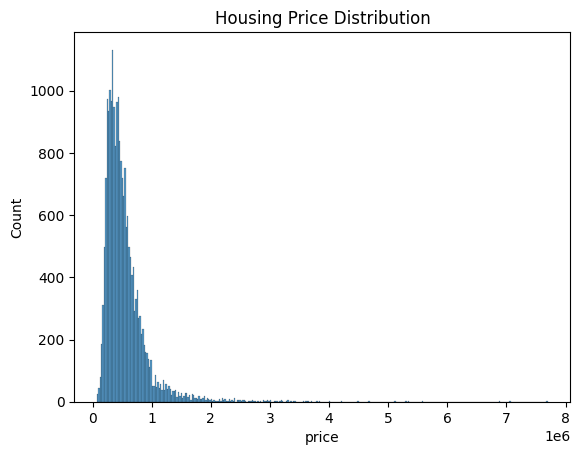

In [7]:
# show the target price's distribution
# in its original numerical format
sb.histplot(x=df['price'])
plt.title('Housing Price Distribution');

In [8]:
# this form of regression is highly sensitive to outliers
# drop tail end of the right skewed distribution
outlier_prices = df[df['price'] > 2000000]
df.drop(outlier_prices.index, inplace=True)

There are a decent amount of outliers here when it comes to the actual target price of the houses, $ y $. As may be seen from the above exploration, the already right-skewed data gets weighed down heavily with a long tail, where less than 1% of the data is able to pull the distribution extremely wide.

In [9]:
# normalize target data with a logarithmic transformation
df['log_price'] = np.log(df['price'])

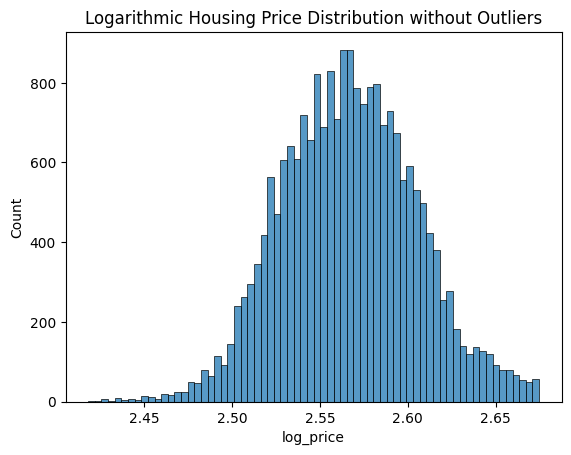

In [10]:
# show the target price's distribution
# with a logarithmic transformation
sb.histplot(x=np.log(df['log_price']))
plt.title('Logarithmic Housing Price Distribution without Outliers');

By clipping the outliers and transforming the price values logarithmically, a refined normal distribution
reveals itself. This will be one of the single most important steps in preparing the data for analysis
with linear regression.

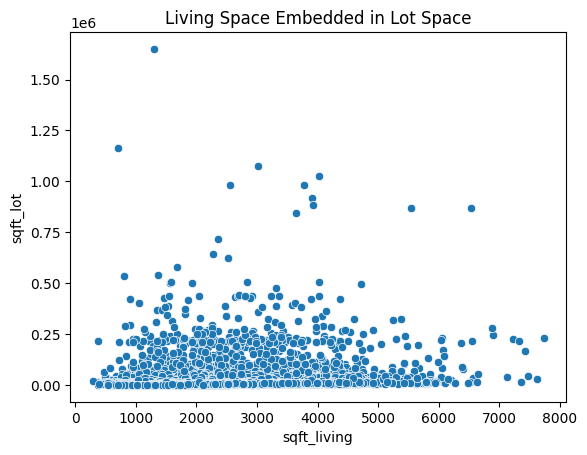

In [11]:
sb.scatterplot(x=df['sqft_living'], y=df['sqft_lot'])
plt.title('Living Space Embedded in Lot Space');

In [12]:
# remove the living space from
# the total lot space
df['sqft_lot'] -= df['sqft_living']

It appears as though the size of the house itself was embedded into the total size of the lot by default. This creates an unnecessary correlation- although these two things may be intrinsicaly linked in some way, the before and after plotting (with and without the inclusion of the house size in the total lot size) does not show a major trend here. In some circumstances this relationship may want to be carefully analyzed, but representing the information like this would overly confound the weight coefficients for the regressor between these two features.

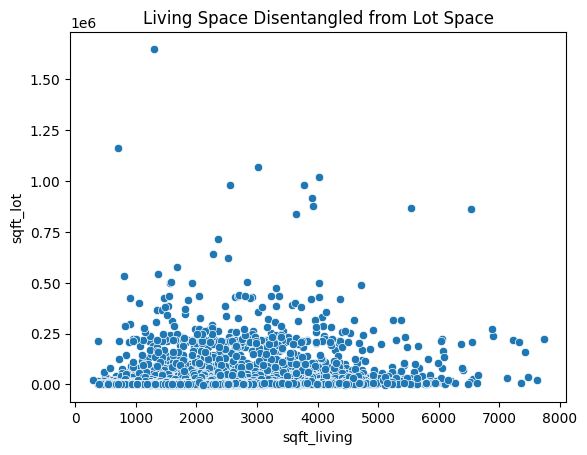

In [13]:
sb.scatterplot(x=df['sqft_living'], y=df['sqft_lot'])
plt.title('Living Space Disentangled from Lot Space');

Scatterplots are really powerful to get a visual sense of the connection a feature vector has with the
dependent variable that will be predicted in the problem set. They can also help tease outliers to stand
out, show which features may be related, or give hints into different aspects of feature engineering 
that might be needed.

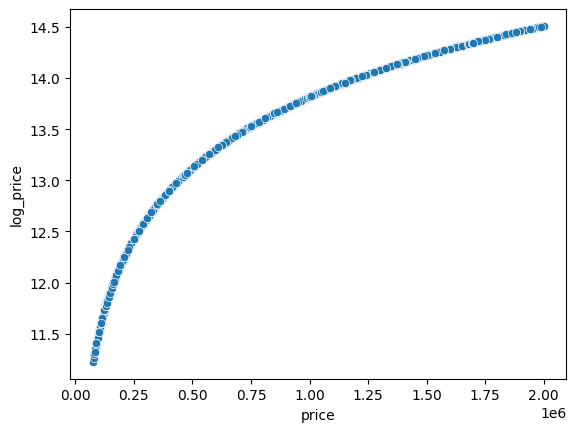

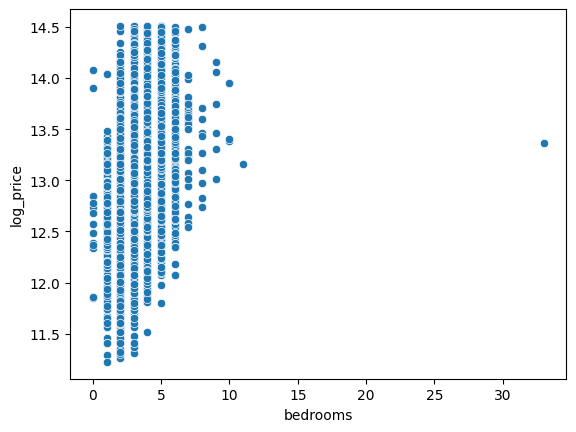

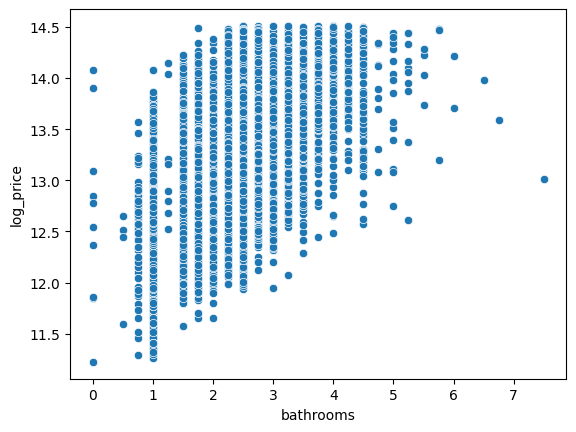

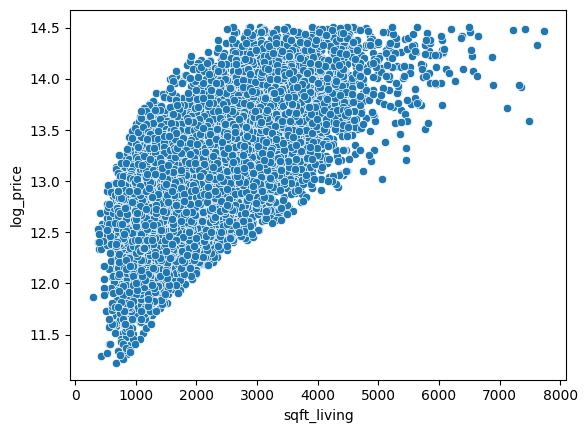

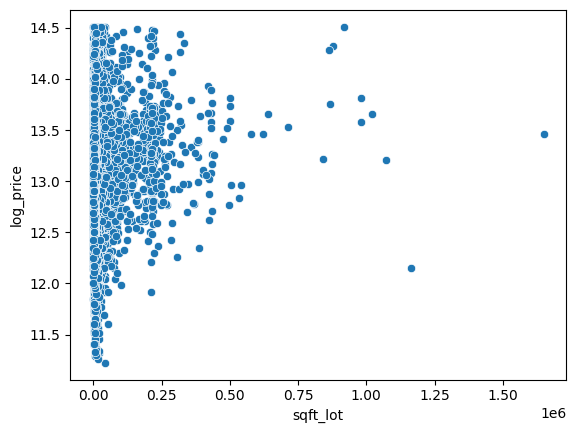

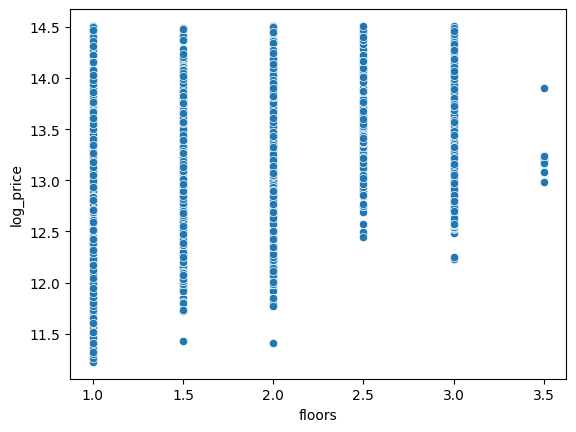

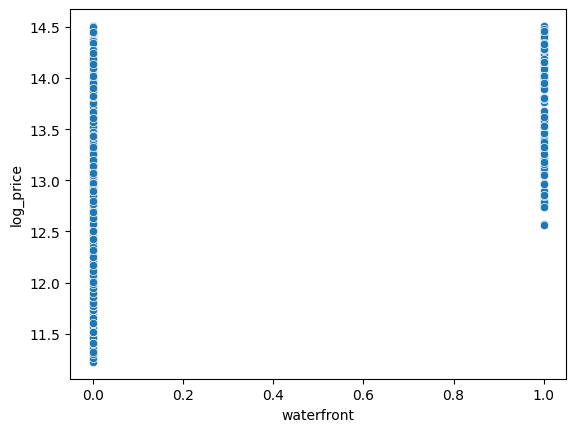

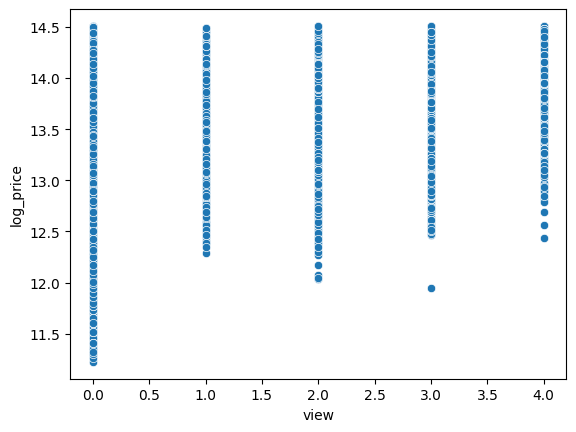

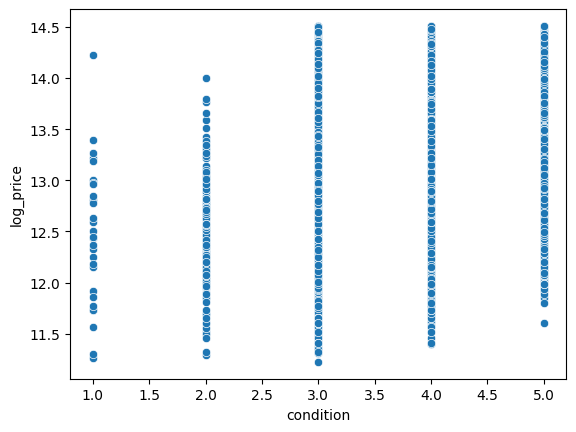

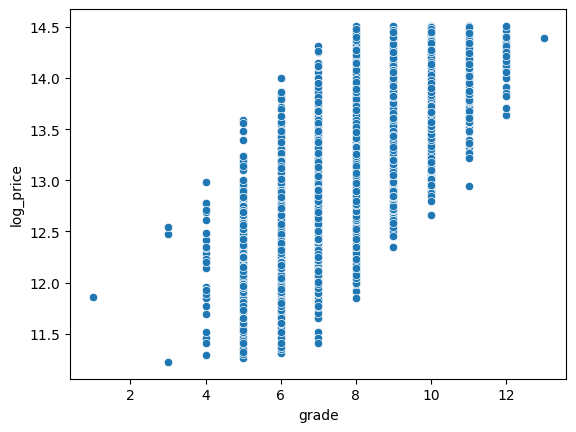

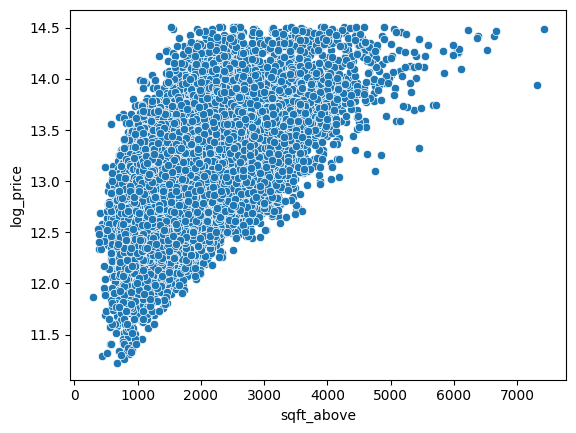

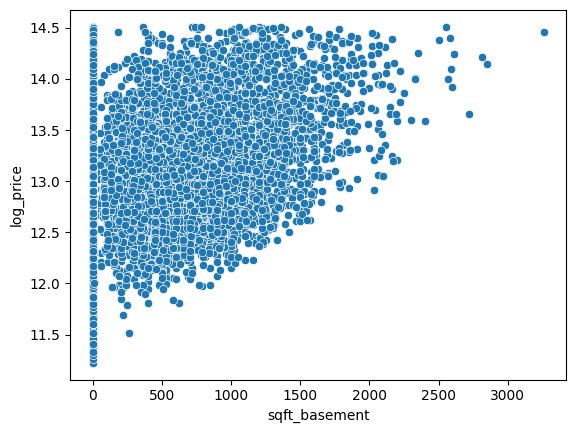

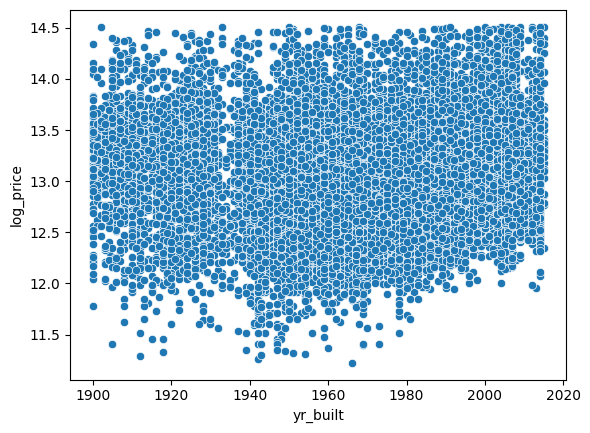

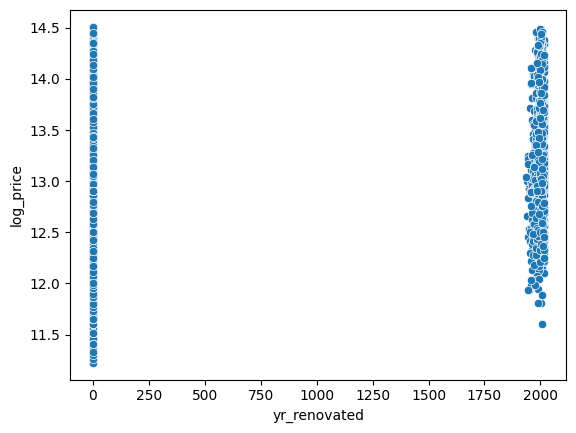

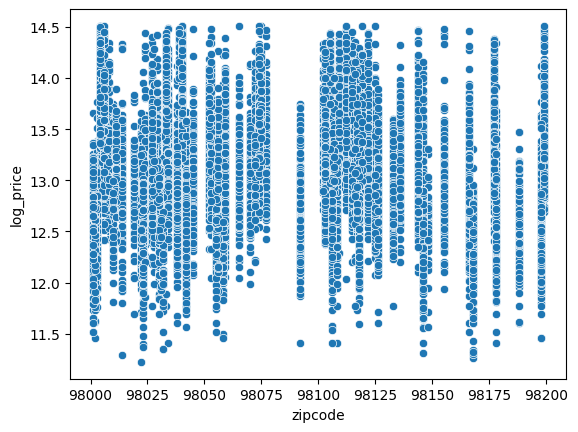

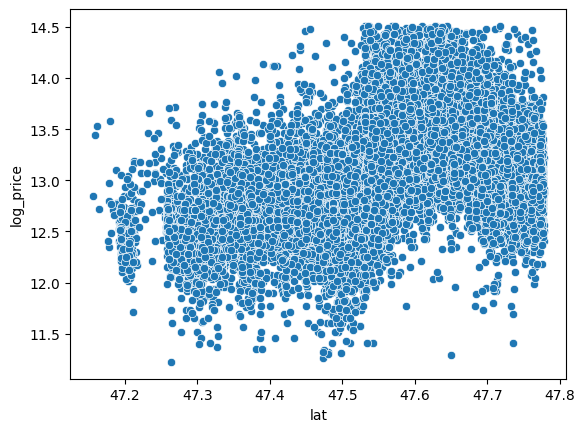

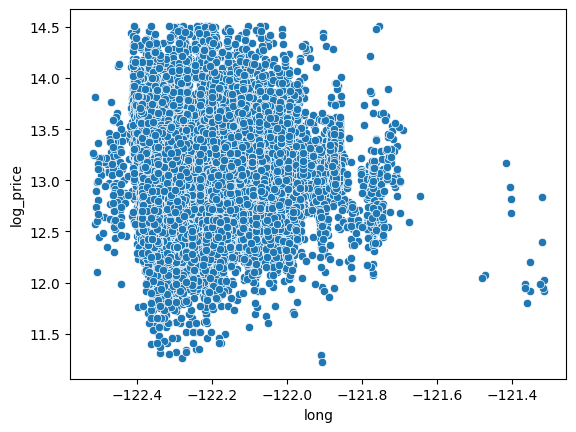

In [14]:
# show how each feature relates to the target price
# by using a series of scatterplots
for col in df.columns[2:-3]:
    plt.figure()
    sb.scatterplot(x=df[col], y=df['log_price']);

Above is a series of two dimensional scatterplots, where each combination shows how a single feature is related to the logarithmic price of the houses. The efficacy of the log transform on the housing prices is confirmed with the smooth curve seen in the scatterplot. There is a single outlier in terms of bedrooms and the lot size. I like checking
something like this out for each feature, at least once if possible. Certain intuitions will get
confirmed, such as a house being more expensive in general the more bedrooms or bathrooms it has.
Another great example is the year a house was renovated- because of the way this feature column
was established, from a numerical point of view it isn't even really possible to distinguish 
the year a house was renovated (if it was) based on the perspective of the graph. This is a perfect
candidate for a boolean transformation. Another tricky point is the zip code- although it may be
seen as numerical data, really it should be treated as categorical. A problem is posed, though,
due to the high cardinality that would be imposed in the features if the zip code was appropriately
one-hot encoded.

In [15]:
# comb out drastic outliers
# drop house with 33 bedrooms, max becomes 11
df.drop(df[df['bedrooms'] == 33].index, inplace=True)

# drop 1650059 sqft_lot, max becomes 1164084
df.drop(df[df['sqft_lot'] == 1650059].index, inplace=True)

In [16]:
# bring the year the house was renovated
# to a boolean yes/no value rather than
# a continous value
df.loc[df['yr_renovated'] > 0, 'yr_renovated'] = 1
df.rename(columns={'yr_renovated': 'renovated'}, inplace=True)

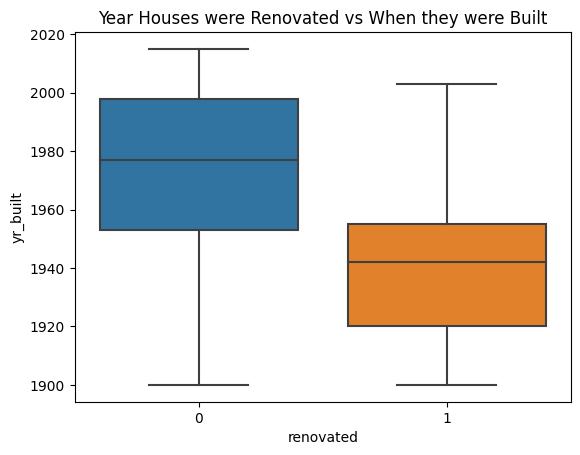

In [17]:
sb.boxplot(x=df['renovated'], y=df['yr_built'])
plt.title('Year Houses were Renovated vs When they were Built');

Switching the numerical yr_renovated column to a boolean renovated feature, and bringing it to
a box plot from a scatterplot, had a major impact on the interpretability of this element of the data.
It also acts as a sanity check to recognize that the older a house is, the more likely it is that it
would be renovated (compared to a newer house).

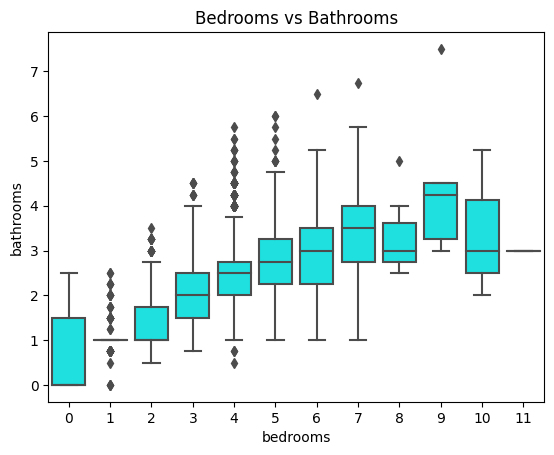

In [18]:
# show a few key relationships
sb.boxplot(x=df['bedrooms'], y=df['bathrooms'], color='cyan')
plt.title('Bedrooms vs Bathrooms');

Here is another phenomenal example of a box plot, emphasizing the importance of exploratory visualizations.
Again, it makes sense that the more bedrooms a house has, the more bathrooms it will have (implying
a larger overall square footage of the living space, and the capacity to comfortably house a larger
family).
                                                                                        

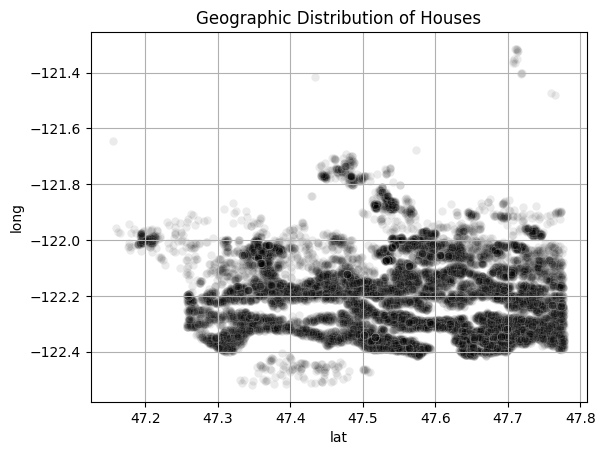

In [19]:
# view the geographical distribution of each house
sb.scatterplot(x=df['lat'], y=df['long'], 
               alpha=0.08, **{'color': 'k'})
plt.title('Geographic Distribution of Houses')
plt.grid();

This is a mapping of the houses, in terms of their latitude and longitude. It helps to develop an
idea of how densely populated the layout of the county is, without necessarily drilling into the specific
geographical details that would be revealed by a map.

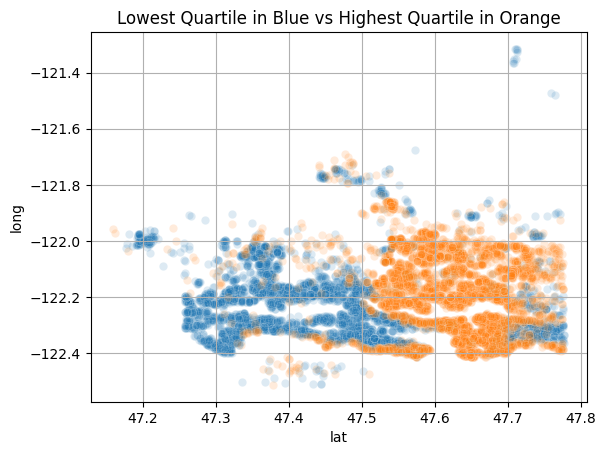

In [20]:
# compare the distributions of that which
# costs below the 25% percentile as blue 
sb.scatterplot(x=df[df['price'] < 320000]['lat'],
               y=df[df['price'] < 320000]['long'],
               alpha=0.15);
# compared to that which costs above the 
# 75% percentile as orange
sb.scatterplot(x=df[df['price'] > 635000]['lat'],
               y=df[df['price'] > 635000]['long'],
               alpha=0.15);  
plt.title('Lowest Quartile in Blue vs Highest Quartile in Orange')
plt.grid()

It might be imagined that the orange in the display above is the actual city of Seattle, where
this color is distinguishing houses that are beyond the 75th percentile in terms of their price.
The blue seen are those that fall below the 25th percentile. This comparison of cost, density,
and location may be due to natural circumstances, where, the value of a house might be influenced 
by its proximity to resources, such a water. It might also be influenced by artificial circumstances,
such as various cultural, political, class, or social factors.

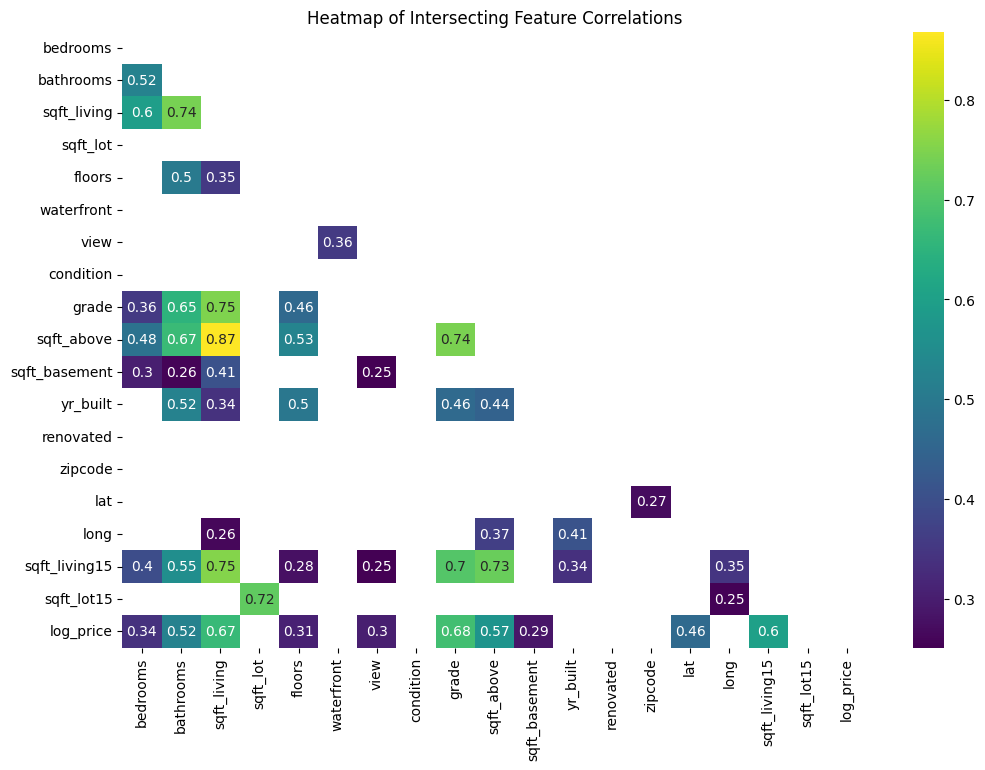

In [21]:
# visualize the correlation each feature has to every other
plt.figure(figsize=(12,8))
corr = df.drop(['id', 'date', 'price'], axis=1).corr()

# screen that filters out the lower left triangle of the 
# plot, which will be inverted as a mask in the graph to 
# retain the lower left and obfuscate the upper right
mask = np.triu(corr) 

sb.heatmap(corr, 
           cmap='viridis', 
           annot=True, 
           mask=mask | (corr < 0.25)); # greater than a 25% correlation

plt.title('Heatmap of Intersecting Feature Correlations');

The heatmap reveals numerically the connection between each feature and every other feature. Here, the lighter 
the color, the stronger the harmony. The scatterplots did a great job showing items of importance as it relates
to the target that will be predicted- this is reiterated here, with the addition of revealing the same for
the independent variables. The upper right triangle has been removed for legibility, as it would otherwise
repeat and reflect the lower left. The weakest correlations have been filtered out with a mask. This kind of
graph helps determine what will be included in the regressor, but it has its pitfalls. An example is that
latitude and longitude will definitely affect the price of a house, as has been shown, but this heatmap
is only portraying each item on a 1:1 numerical plane.



<a id='instant'></a>
## III. Model Instantiation & Evaluation

Now that there is a fairly clear picture of not only what the data looks like, but what it _feels_ like,
it is time to spin up a few models.

In [22]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price'],
      dtype='object')

In [23]:
# select features and split data
essential_features = ['bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', 'view', 'condition', 
                      'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'renovated', 'lat', 'long']

X = df[essential_features]
y = df[['log_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

After mulling over the features, their relationships, and what might best indicate the value of a house,
certain items have been kept, others changed, and some dropped. Living space was removed from the total
lot size. yr_renovated became a boolean variable. id, date, zipcode, sqft_living15, and sqft_lot15 have
been discarded. sqft_living is present as the individual components sqft_above and sqft_basement, but
left out in its summation. From munging to engineering, everything is ready.

In [24]:
def pipeline(X_train, X_test, y_train, y_test,
             model_type='polynomial', degree=1, retain=False):
    """ Build, train, evaluate, and save a linear regression model variant.
    
    INPUT:
    X_train, X_test, y_train, y_test: dataframe. Previously prepared and
        split features and targets, ready to be fed to the pipeline
    model_type: str. polynomial, lasso, or ridge
    degree: int. Linear regression, Lasso, and Ridge is considered 1st degree;
        higher degrees imply polynomial features of increasing complexity
    retain: bool. Whether or not the features, scaler, model, and synopsis
        should be kept for deployment and inference
    """
    if model_type=='polynomial' and degree > 1:
        # create new features of the desired complexity
        poly_feat = PolynomialFeatures(degree=degree)
        X_train = poly_feat.fit_transform(X_train)
        X_test = poly_feat.transform(X_test)

    # scale features to a mean of 0 and a standard deviation of 1
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # establish the algorithm and nourish its learning
    if model_type=='polynomial':
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # l1 regularization; absolute value
    elif model_type=='lasso':
        model = Lasso()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
    # l2 regularization; squared value    
    elif model_type=='ridge':
        model = Ridge(alpha=10000) # default- alpha=1
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)        
    
    
    
    rank = f'Polynomial Degree: {degree}'
    print(rank)
    
    # use the trained model to make predictions on the 
    # engineered testing data and evaluate the loss
    loss = f'Error: {mean_absolute_error(y_test, y_pred):,.5f}'
    print(loss)
    
    # proportion of the variation in the target price
    # that is predictable from the evaluated features
    var = f'Predictable Variation: {r2_score(y_test, y_pred)*100:.2f}%'
    print(var)
    
    acc = f'Model Accuracy: {(1 - mean_absolute_percentage_error(y_test, y_pred))*100:.2f}%'
    print(acc)
    print()
    
    # examine the scaling coefficient for each feature
    if model_type=='polynomial':
        coef = [f'{X.columns[i]}: {model.coef_[0][i]:.5f}' for i in range(len(X.columns))]  
        
    elif model_type=='lasso': 
        coef = [f'{X.columns[i]}: {model.coef_[i]}' for i in range(len(X.columns))]
        
    elif model_type=='ridge':
        coef = [f'{X.columns[i]}: {model.coef_[0][i]:.5f}' for i in range(len(X.columns))]      
        
    print(f'Model Coefficients: {coef}')
    
    # and the bias for the entire linear model
    b = f'Intercept: {model.intercept_[0]:,.5f}'
    print(b)
    
    
    
    # gather model evaluation record for transparency during inference
    if retain:
        synopsis = [rank, loss, var, acc, coef, b]
        
        if model_type=='polynomial' and degree > 1:
            return poly_feat, scaler, model, synopsis
        
        else:
            return scaler, model, synopsis
    else:
        # discard unneeded models to free up memory
        pass

With the above function, multiple regression variants are able to be invoked, the data is melted down and refined,
the model called is trained, used for prediction, and evaluated in multiple ways, and, if desired,
is kept for later. Below is a brief enumeration of some of the key principles used to create this
machine learning pipeline. It assumes some familiarity with mathematical notation, and is only really scratching the surface.

### Standardization

Before the data is fed to the model, an essential pre-processing step is performed in order to shift the 
relative layout of it. This is done by subtracting the mean of the population (in this case, the entire 
training set of housing data) from each feature for each individual house, and dividing by the
standard deviation. This changes the landscape that the data lives within, bringing the mean to zero and
the standard deviation to one. From this perspective, the weight coefficients for each feature will be 
much smaller overall (and in relation to each other). Said simply, standardization helps the model pick
out significant patterns easier. It may be seen as:

$$ z = \dfrac{(x - \mu)}{\sigma}, $$
$$ \text{where:} $$
$$ z\; \text{is the standardized datum}, $$
$$ x\; \text{is the original datum}, $$
$$ \mu\; \text{(mu) is the mean of the data}, $$
$$ \text{and}\; \sigma\; \text{(sigma) is the standard deviation of the data}. $$

### Linear Regression

The general principal algorithm which acts as the foundation of statistical and analytical tools at our disposal 
throughout data science broadly and machine learning specifically may be seen as:

$$ \hat{y} = Wx + b, $$
$$ \text{where:} $$ 
$$ \hat{y}\; \text{is the prediction,} $$
$$ W\; \text{is the weight matrix,} $$
$$ x\; \text{is the feature vector,} $$
$$ \text{and } b\; \text{is the bias.} $$

This is to say, that, in order to make our prediction $ \hat{y} $ (which, in this case, is the price of a house), 
we utilize linear algebra to take the dot product of the weight matrix $ w $ (which are coefficients learned by 
regression), against the feature matrix $ X $ (which, in this case, are the distinguishing characteristics of 
each house, such as the number bedrooms), and add _some_ bias $ b $ (an intercept; which is also learned by 
regression). This may be expanded as follows:


$$ \hat{y} = w_1x_1 + w_2x_2 + w_3x_3 + ... + w_nx_n + b, $$
$$ \text{for}\; i=1\; \text{up to}\; n, $$
$$ \text{where:} $$
$$ w_1\; \text{is the first scalar coefficient}, $$
$$ x_1\; \text{is the first feature}, $$
$$ i\; \text{is the index, beginning at one}, $$
$$ ...\; \text{is so on and so forth; all the way up to}, $$
$$ \text{and}\; n\; \text{is the number of records}. $$

Meaning, that we take each element in our feature vector $ x_1 $ (such as the number of bedrooms per house
for every house in our dataset), measure it against a learned weight coefficient $ w_1 $ (which gauges the
relative importance the overall regression model should evaluate in relation to this specific feature column
compared to every other feature column in order to predict our target variable), and repeat this for every 
feature column/scalar coefficient pair, such as: $ w_2x_2 $ (like the number of bathrooms), or 
$ w_3x_3 $ (like the lot size in sqft). This is done for every house $ i $ in the dataset, for the number
of houses in the entire dataset $ n $. By making this prediction $ \hat{y} $ across all of our training data,
the regressor is able to learn a general approximation of the overall equation (making it robust, and able to
infer the price of a house it has not seen, such as in the testing data, due to an appropriate fit of the 
underlying meaning and value of each individual feature and how they combine). The overall mathematical 
equation is then adjusted by _some_ intercept, which might be expressed as a reasonable baseline or 
default for the algorithm to begin from. For further details, the concept of ordinary least squares is often
seen as the essential form of linear regression. The above edification might be seen as the skeleton of
this process.

### Mean Absolute Error (MAE)

Having made predictions, the error is calculated by looking at the difference between the actual target value 
(such as the official price a house sold for), and the predicted target value (the estimation of the price
based on the current state of the coefficients and the specific features analyzed). In this specific loss
formula, the absolute value of that difference is compiled for the entire dataset, and averaged against the
total number of samples shown. One potential way to express this would be:

$$ MAE = \dfrac{1}{m} \sum\limits_{i=1}^{m} |y_i - \hat{y}_i| $$
$$ \text{where:} $$
$$ MAE\; \text{is the mean absolute error}, $$
$$ m\; \text{is the size of the data}, $$
$$ \sum\; \text{(Sigma) is the sum of all elements}, $$
$$ i\; \text{is the index, beginning at one}, $$
$$ | |\; \text{is the absolute value}, $$
$$ y\; \text{is the true target}, $$
$$ \text{and}\; \hat{y}\; \text{is the predicted target}. $$

In terms of this specific dataset, if the house price was in its original format, the error might be
seen as the margin in which the prediction differs from the actual sale price in USD. As an example, an error such 
as +/- $20,000 in the price of a house, could simply be seen as the relative mercantilism of a buyer and
a seller through the process of bidding or bartering.

### $ R^2 $ Score

This metric is also known as the coefficient of determination. Informally, it might be seen as the amount
of variability in the dependent variable (the housing price), that may be adequately captured by the
independent variables (bedrooms, bathrooms, et cetera). It may be expressed as one minus the sum of the squares
of the residuals (RSS) divided by the total sum of squares (TSS):

$$ R^2 = 1 - \dfrac{RSS}{TSS} $$
$$ \text{where:} $$
$$ RSS = \sum\limits_{i=1}^n(y_i-\hat{y}_i)^2, $$
$$ TSS = \sum\limits_{i=1}^{n}(y_i-\bar{y}_i)^2, $$
$$ n\; \text{is the size of the dataset}, $$
$$ \sum\; \text{(Sigma) is the sum of all elements}, $$
$$ i\; \text{is the the index, beginning at one}, $$
$$ y\; \text{is the true target}, $$
$$ \hat{y}\; \text{is the predicted target}, $$
$$ \bar{y}\; \text{is the sample mean}, $$
$$ \text{and}\; ^2\; \text{is the square of the value}. $$

### Mean Absolute Percentage Error (MAPE)

This metric may be seen as the predictive accuracy of the model. It has limitations when our true target value 
$ y $ is very small or when the absolute difference between the true target value and the predicted target 
value $ \hat{y} $ is very large. One way to express this would be:

$$ MAPE = 100 \dfrac{1}{n} \sum\limits_{i=1}^{n} \left| \dfrac{y_i - \hat{y}_i}{y_i} \right| $$
$$ \text{where:} $$
$$ MAPE\; \text{is the mean absolute percentage error}, $$
$$ n\; \text{is the size of the data}, $$
$$ \sum\; \text{(Sigma) is the sum of all elements}, $$
$$ i\; \text{is the index, beginning at one}, $$
$$ | |\; \text{is the absolute value}, $$
$$ y\; \text{is the true target}, $$
$$ \text{and}\; \hat{y}\; \text{is the predicted target}. $$

In [25]:
# algorithm without polynomial features or
# regularization to establish baseline
# linear regression; 1st degree polynomial
pipeline(X_train, X_test, y_train, y_test, model_type='polynomial')

Polynomial Degree: 1
Error: 0.20068
Predictable Variation: 73.14%
Model Accuracy: 98.46%

Model Coefficients: ['bedrooms: -0.01391', 'bathrooms: 0.06010', 'sqft_lot: 0.01124', 'waterfront: 0.02558', 'view: 0.04608', 'condition: 0.04337', 'grade: 0.20120', 'sqft_above: 0.15013', 'sqft_basement: 0.06733', 'yr_built: -0.08843', 'renovated: 0.01387', 'lat: 0.19123', 'long: 0.00029']
Intercept: 13.03169


This is our baseline. Linear Regression is the foundational benchmark- it can and should be included in even the most advanced projects to establish a reasonable point of reference.

### Lasso; L1 Regularization with Absolute Coefficients

Here, a coefficient penalty is added to the original linear regression algorithm. What this means, is that the 
larger the weights for each feature are, the more significant is the error incurred from the regularization
term. The original loss from the equation (meaning, how incorrect the prediction was), is compounded with the
regularization error (which is compiled based on the complexity of the model). The larger the weights, the higher
the penalty, the greater the term appended to the formula, and the more drastic is the overall error. With L1
regularization, this additional error term is calculated based on the absolute error of the coefficients. This may
be seen as:

$$ + \dfrac{\lambda}{m} \sum\limits_{j=1}^{n} |\theta_j|, $$
$$ \text{where:} $$
$$ \lambda\; \text{(lambda) is the regularization term}, $$
$$ m\; \text{is the size of the data}, $$
$$ \sum\; \text{(Sigma) is the sum of all elements}, $$
$$ j\; \text{is the index, beginning at one}, $$
$$ n\; \text{is the number of feature columns}, $$
$$ | |\; \text{is the absolute value}, $$
$$ \text{and}\; \theta\; \text{(theta) is the coefficient vector}. $$

This means that the full error may be considered as:

$$ E = (\dfrac{1}{m} \sum\limits_{i=1}^{m} |y - \hat{y}|) \
+ (\dfrac{\lambda}{m} \sum\limits_{j=1}^{n} |\theta_j|) $$

$ \lambda $ punishes complexity- where a large penalty means that a simpler model 
will have less regularization and a smaller penalty, and that a more complex model is able
to better fit the data without being crushed.

In [26]:
# lasso; 1st degree polynomial with l1 regularization 
# based on absolute value of coefficients
pipeline(X_train, X_test, y_train, y_test, model_type='lasso')

Polynomial Degree: 1
Error: 0.40078
Predictable Variation: -0.00%
Model Accuracy: 96.92%

Model Coefficients: ['bedrooms: 0.0', 'bathrooms: 0.0', 'sqft_lot: 0.0', 'waterfront: 0.0', 'view: 0.0', 'condition: 0.0', 'grade: 0.0', 'sqft_above: 0.0', 'sqft_basement: 0.0', 'yr_built: 0.0', 'renovated: 0.0', 'lat: 0.0', 'long: 0.0']
Intercept: 13.03169


Here, the L1 regularization with absolute values squashed the weights. They're there, they're just
very, very small. This definitely damaged the algorithms ability to adequately map the features to the target,
leaving it underfitting and difficult to interpret. Granted, in a different circumstance, this L1 is
essential (such as, generating sparse vectors for feature selection).

### Ridge; L2 Regularization with Squared Coefficients

The previous mathematical notation seen above may be re-duplicated here below, with a slight shift in the equation.
Here, rather than penalizing based on the absolute value of the weight coefficient as in L1 regularization,
L2 may be seen using the squared value. It is the sum of the vector $ \theta $ squared, multiplied by the
regularization term $ \lambda$  over the size of the data $ m $, where $ n $ is the number of features:

$$ E = (\dfrac{1}{m} \sum\limits_{i=1}^{m} |y - \hat{y}|) \
+ (\dfrac{\lambda}{2m} \sum\limits_{j=1}^{n} \theta_j^2) $$

In [27]:
# ridge; 1st degree polynomial with l2 regularization
# based on the squared value of coefficients
# low regularization such as alpha=1 (default), 10, or 100
# showed little change compared to the baseline, with a
# higher penalty such as 1000 or 10000 damaging the model
pipeline(X_train, X_test, y_train, y_test, model_type='ridge')

Polynomial Degree: 1
Error: 0.22375
Predictable Variation: 68.04%
Model Accuracy: 98.28%

Model Coefficients: ['bedrooms: 0.02016', 'bathrooms: 0.06202', 'sqft_lot: 0.01205', 'waterfront: 0.01922', 'view: 0.04779', 'condition: 0.02857', 'grade: 0.13182', 'sqft_above: 0.09879', 'sqft_basement: 0.04795', 'yr_built: -0.03468', 'renovated: 0.01810', 'lat: 0.13123', 'long: -0.00418']
Intercept: 13.03169


Take this result with a grain of salt- I severely cranked up the alpha parameter just to see the effect
on the coefficients and metrics. With the default alpha of 1, or even a low level, the model was virtually
identical to the base model (save for a few floating decimal points). To really start to see the effects
of the L2 regularization, this argument was overdone. It hurt the model directly at every point, but not
quite as sharply as L1. Again, depending on the situation, this form of regularization would be vital.

### Polynomial Regression; 2nd Degree

 It may be imagined that classical Linear Regression is a utilization of first degree polynomial features. When
 the complexity of the data warrants a more complex equation to generalize it (such as, a polynomial curve rather
 than a single straight line), factors of a higher degree (such as $ x^2 $ or $ x^3 $) may be included in the
 coefficients to map a more robust set of feature dimensions. To enumerate one version of the formula briefly, 
 it may be seen as:

$$ \hat{y} = \beta_0x^0 + \beta_1x^1 + \beta_2x^2 + \beta_3x^3 + ... + \beta_mx^m $$
$$ \text{where:} $$
$$ \beta_{(0-m)}\; \text{is the polynomial coefficient}, $$ 
$$ \text{and}\; x^{(0-m)}\; \text{is the corresponding feature}. $$

This ability to map more complex and complicated feature dimensions allows the second degree polynomial
regression model to outperform the linear regression model, which, although it was able to perceive the
distinctions in the data quite nicely, could be considered as _slightly_ underfitting. This is in juxtaposition
to the third and fourth degree polynomial regression models expressed down below, whose coefficients
detonate and lose their ability to generalize to unseen data in a mess of shrapnel and overfitting.

In [28]:
# 2nd degree polynomial regression; all metrics improve
features, scaler, model, synopsis = pipeline(X_train, X_test, y_train, y_test, 
                                             model_type='polynomial', degree=2, retain=True)

Polynomial Degree: 2
Error: 0.17686
Predictable Variation: 78.20%
Model Accuracy: 98.64%

Model Coefficients: ['bedrooms: 0.00000', 'bathrooms: 14.74799', 'sqft_lot: -2.84551', 'waterfront: 8.31797', 'view: 2.73841', 'condition: 5.76257', 'grade: 10.99764', 'sqft_above: -29.51885', 'sqft_basement: -10.38364', 'yr_built: -4.10321', 'renovated: 26.74672', 'lat: 2.47161', 'long: 31.24971']
Intercept: 13.03169


This is what a perfect fit looks like. The higher, second degree polynomial features enabled the model to have
a depth of complexity that picked out latent connections in the data. All metrics improved smoothly. The baseline,
first degree polynomial classical linear regression model was very good, but compared to this second degree model, the first degree is _ever so slightly_ underfitting.

### Polynomial Regression; 3rd Degree

In [29]:
# 3rd degree polynomial; predictable variation drops significantly
pipeline(X_train, X_test, y_train, y_test, model_type='polynomial', degree=3)

Polynomial Degree: 3
Error: 0.47508
Predictable Variation: -17241.68%
Model Accuracy: 96.45%

Model Coefficients: ['bedrooms: -0.00000', 'bathrooms: -2225.86558', 'sqft_lot: 1078.18555', 'waterfront: 3559.68114', 'view: 2.94180', 'condition: 1125.53288', 'grade: -1891.68032', 'sqft_above: -424.66098', 'sqft_basement: -2086.38925', 'yr_built: 792.81589', 'renovated: -1628.97387', 'lat: -236.87892', 'long: -36752.44781']
Intercept: 13.03169


Due to the complexity afforded the model with the third degree polynomial features, it essentially starts to memorize the training data, overfitting, and loses its ability to generalize to new, unseen data (such as in testing, or, eventually in inference). The coefficients are of a high magnitude, and the predictable variation breaks. Loss is at an all time high. MAPE seems to have only dropped a small amount, but with the other considerations it is clear that a wrong turn has been taken here.

### Polynomial Regression; 4th Degree

In [30]:
# 4th degree polynomial; all metrics break,
# explainability is lost, feature creation computation time explodes
pipeline(X_train, X_test, y_train, y_test, model_type='polynomial', degree=4)

Polynomial Degree: 4
Error: 4,227,042.67254
Predictable Variation: -4796814191535242240.00%
Model Accuracy: -30994615.88%

Model Coefficients: ['bedrooms: -5.21960', 'bathrooms: -439864.51738', 'sqft_lot: -1357396.48452', 'waterfront: -911535.69326', 'view: 112751865.66716', 'condition: -1886160.72262', 'grade: 3292668.92691', 'sqft_above: 7318908.36681', 'sqft_basement: 4571866.25132', 'yr_built: -78462.83217', 'renovated: -7313563.27244', 'lat: -1064961.34473', 'long: 9911373.31017']
Intercept: 13.03105


This is the overfitting discussion from the third degree polynomial writ large and taken
to perpetuity. All metrics break, and it is simply a regurgitation of the training set without any ability
to intuit the underlying value of new information.

In [31]:
# model inference
def random_sample(features, scaler, model):
    """ Randomly generate the features of a sample house for model inference.
    
    INPUT:
    features: Polynomial Features used to transform input data to a higher
        degree of complexity
    scaler: StandardScaler used to standardize input data to have a mean of
        zero and a standard deviation of one, relative to the training set
    model: Polynomial regressor of the second degree
    """
    # random sample to evaluate the model's 
    # performance during inference
    n_beds = np.random.randint(1, 6)
    n_baths = np.random.randint(1, 4)
    on_water = np.random.randint(0, 2)
    vw = np.random.randint(0, 5)
    cond = np.random.randint(2, 5)
    grd = np.random.randint(2, 11)
    sqft_above = np.random.randint(500, 2500)
    sqft_bsmt = np.random.randint(0, 500)
    yr_blt = np.random.randint(1900, 2016)
    rnv = np.random.randint(0, 2)
    bool_to_str = {0: 'No', 1: 'Yes'}
    s_lat = np.random.uniform(47.16, 47.75)
    s_long = np.random.uniform(-122.5, -121.4)
    sqft_lot = np.random.randint(3000, 12000)

    sample_data = [[n_beds, n_baths, sqft_lot, on_water, cond, vw, grd, 
                    sqft_above, sqft_bsmt, yr_blt, rnv, s_lat, s_long]]
    
    sample = pd.DataFrame(columns=essential_features, data=sample_data)
    
    sample_f = features.transform(sample)
    sample_f_s = scaler.transform(sample_f)

    print(f'Bedrooms: {n_beds}')
    print(f'Bathrooms: {n_baths}')
    print(f'Lot Size: {sqft_lot:,} sqft')
    print(f'On Water: {bool_to_str[on_water]}')
    print(f'Condition: {cond}')
    print(f'Viewed: {vw} time(s)')
    print(f'Grade: {grd}')
    print(f'Above Ground Living Area: {sqft_above:,} sqft')
    print(f'Basement Living Area: {sqft_bsmt:,} sqft')
    print(f'Year Built: {yr_blt}')
    print(f'Renovated: {bool_to_str[rnv]}')
    print(f'Latitude: {s_lat:.2f}')
    print(f'Longitude: {s_long:.2f}')
    print(f'Price Prediction: ${np.exp(model.predict(sample_f_s)[0][0]):,.0f}')

In [32]:
# use best model for inference; this may be re-run 
# multiple times to evaluate legitimacy of results
random_sample(features, scaler, model)

Bedrooms: 1
Bathrooms: 2
Lot Size: 10,029 sqft
On Water: No
Condition: 4
Viewed: 0 time(s)
Grade: 10
Above Ground Living Area: 549 sqft
Basement Living Area: 458 sqft
Year Built: 1910
Renovated: Yes
Latitude: 47.25
Longitude: -121.68
Price Prediction: $105,151


The above cell should be repeated innumerable times to simulate new data. It is assumed that the best model,
a polynomial of the 2nd degree, is used for sample generation based on the polynomial features created
within the pipeline. Reasonable ranges were decided for each feature. For a project like this, it is vital 
to actually check the result on new data multiple times to see if it even makes sense. Each generated 
combination of features tells a story, and the prediction should reflect that story as its logical 
conclusion.

<a id='saving'></a>
## IV. Saving, Loading & Inference

In [33]:
# save the polynomial features, scaler, model, and synopsis 
with open('housing_prices_polynomial_regressor', 'wb') as f:
    pickle.dump([features, scaler, model, synopsis], f)

Depending on how linear regression is implemented, it may be considered a closed-loop solution. This
is not always the case- especially for advanced algorithms. Often times, the most powerful of models
may take days, if not weeks or more, to train, and even longer to prepare and develop. All of this
work may be valuable from a research perspective, but without the ability to package a model, transfer it,
share it, deploy it, and interface with it, it is industrially nullified. This essential step is simulated
here, by saving the developed model and pipeline to a pickle file through Python.

In [34]:
# load the model to simulate its deployment to an api
with open('housing_prices_polynomial_regressor', 'rb') as f:
    features, scaler, model, synopsis = pickle.load(f)

Re-loading the pickle file can be seen as that vital deployment step that is the life's blood of data science. The model can be set up with a simple interface to allow the retiring real estate agent to make sure that they are satisfied with the veracity of its results in practice, before turning it over to their protege upon retirement. For actually engaging with an application program interface, it would be necessary to establish lower and upper bounds for each feature input that break the model's training weights, format and handle incoming data types to avoid, for example, accepting a boolean where there should be an integer, and exclude any potential html code injections seeking to exploit vulnerabilities on the back-end.

In [35]:
# reveal key aspects of the model to the user
synopsis[:4]

['Polynomial Degree: 2',
 'Error: 0.17686',
 'Predictable Variation: 78.20%',
 'Model Accuracy: 98.64%']

In [36]:
# simulate inference from a user
n_beds = 3
n_baths = 2
on_water = 1
vw = 2
cond = 4
grd = 6
sqft_above = 1200
sqft_bsmt = 200
yr_blt = 1980
rnv = 1
s_lat = 47.55
s_long = -122
sqft_lot = 4600

house_data = [[n_beds, n_baths, sqft_lot, on_water, cond, vw, grd, 
          sqft_above, sqft_bsmt, yr_blt, rnv, s_lat, s_long]]

# connect user input to original column names for polynomial features
house = pd.DataFrame(columns=essential_features, data=house_data)

house_f = features.transform(house)
house_f_s = scaler.transform(house_f)

print(f'Price Prediction: ${np.exp(model.predict(house_f_s)[0][0]):,.0f}');

Price Prediction: $986,361


<a id='recap'></a>
## V. Recapitulation

Here, the power of linear regression and its variants was demonstrated. This statistical algorithm acts as the foundation of machine learning as we know it today. It has a certain staying power in the industry, due to its interpretability and coefficient transparency. 

Our retiring real estate agent client now has the opportunity to engage with the machine learning model to ensure it is practically valuable in the field, before turning it over to their protege. Having this resource will allow the business to maintain its reputation, and ensure that a fair deal is struck on all sides in spite of the protege's inexperience when compared to the long-term business owner. This final deliverable will aid in the continuation of the business, as it takes a step toward a new generation.

<a id='sources'></a>
## VI. Sources

An honest attempt was made to work from first principles; any viewing of another's work (be it a project,
piece of documentation, or another engineer's query) were, to the best of my ability, for the purposes of
understanding the concept and implementation; to be able to generalize to the problem at hand. It can be
envisioned that just about every snippet of code or morsel of notation was double-checked, and a true
enumeration of this process would leave a notebook potentially longer than this entire one of source references only. The 
following may be considered a brief summary of the primary sources accessed.

Notebook crafted using [Paperspace](https://www.paperspace.com/notebooks)

Fundamental concepts established through Udacity's [Intro to Machine Learning with PyTorch](https://www.udacity.com/course/intro-to-machine-learning-nanodegree--nd229)

Countless references made to documentation: [pandas](https://pandas.pydata.org/docs/user_guide/index.html),
[scikit-learn](https://scikit-learn.org/stable/user_guide.html)


Error troubleshooting handled with [Stack Overflow](https://stackoverflow.com/questions)

Perspective gained from [Wikipedia](https://www.wikipedia.org/)

Data sourced from [Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

Hosted on [GitHub](http://github.com/)